In [116]:
# 정리
# MZ 세대가 MZ 아닌 세대보다 약 2배(약간 안되게) 가량 주문건수가 많다.
# 동학개미운동(20.01.20~20.03.31) 기간동안, 
# MZ 세대는 MZ 아닌 세대보다 주식 투자를 많이 했다.

# MZ 세대는 MZ 아닌 세대에 비해 거래수량은 많았지만,
# 실주문단가, 주문수량, 총체결수량, 총체결금액은 MZ 아닌 세대보다 작았다.
# 특히, 총체결금액은 MZ 세대가 MZ 아닌 세대에 비해 2배나 작았다.
# 따라서, MZ 세대는 MZ 아닌 세대에 비해 소액으로 여러번 주식투자를 한다.
# -> 최근 동학개미운동의 주역은 MZ 세대이다(어폐, 관심이 많다.)
# -> MZ 세대에게 투자 관련 서비스 제공

In [ ]:
# 지난번 분석에서 tree 모델을 사용하여 추가 분석.
# MZ세대와 MZ아닌세대를 구분하는 중요 feature 는 다음과 같다.
#1. 총체결금액 (<= 1079707.5)
#2. 실주문단가 ()
#3. 거래수량 (<= 6185431.5)
#4. 거래대금 (<= 1169814978560.0)
#5. 주문일자 ()

# 총체결금액: MZ 아님 > MZ 세대
# 거래수량:  MZ 아님 < MZ 세대
# -> 따라서, MZ 세대는 MZ 아닌 세대보다 소액으로 더 많은양을 거래한다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import font_manager, rc

pd.set_option('display.max_columns', None)
warnings.filterwarnings(action='ignore')
pd.options.display.float_format = '{:.5f}'.format
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [2]:
han = pd.read_excel('c:\\data\\fin\\2021금융데이터 경진대회_데이터셋_한국투자증권(원본).xlsx')
han

,고객구분코드,주문일자,고객성별구분코드,동일나이군구분코드,주소(시도),주문시간대,상품번호,상품명,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금,상한가여부,하한가여부
0,A0001,20200128,1,30,경기,1,00000A091970,나노캠텍,3,2,1,3795,20,20,75900,3215,3710,4125,3660,4095,17266597,67323312855,N,N
1,A0001,20200130,1,30,경기,3,00000A045060,오공,3,2,1,7710,20,20,154200,7690,8150,8380,7360,7920,15686931,125404000000,N,N
2,A0001,20200313,1,30,경기,1,00000A253840,수젠텍,3,2,1,11800,10,10,118000,13600,12200,12250,10150,10750,3731106,40782765600,N,N
3,A00010,20200220,1,20,경남,3,00000A009190,대양금속보통주,2,2,1,3505,14,14,49070,3615,3615,3675,3475,3505,635410,2250893355,N,N
4,A000100,20200211,2,40,서울,1,00000A001740,SK네트웍스보통주,2,1,1,4875,3,3,14625,4780,4800,4885,4800,4850,1263089,6112026870,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845935,A0009999,20200331,1,20,충북,2,00000A043200,파루,3,2,1,2020,150,150,303000,1995,2035,2135,1990,2030,2764564,5682482755,N,N
845936,A0009999,20200325,1,20,충북,2,00000A068760,셀트리온제약,3,1,1,63400,8,8,507200,57300,61700,70600,58700,60300,8892944,560929000000,N,N
845937,A0009999,20200330,1,20,충북,1,00000A038290,마크로젠,3,2,1,38800,25,25,970000,38900,40050,40800,37500,40400,1912985,75631708300,N,N
845938,A0009999,20200323,1,20,충북,1,00000A000660,에스케이하이닉스보통주,2,1,1,69200,8,8,553600,74800,69700,71600,68000,69400,8037426,560505000000,N,N


In [4]:
han.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845940 entries, 0 to 845939
Data columns (total 24 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   고객구분코드     845940 non-null  object
 1   주문일자       845940 non-null  int64 
 2   고객성별구분코드   845940 non-null  int64 
 3   동일나이군구분코드  845940 non-null  int64 
 4   주소(시도)     845940 non-null  object
 5   주문시간대      845940 non-null  int64 
 6   상품번호       845940 non-null  object
 7   상품명        845940 non-null  object
 8   거래소구분코드    845940 non-null  int64 
 9   매도매수구분코드   845940 non-null  int64 
 10  주문구분코드     845940 non-null  int64 
 11  실주문단가      845940 non-null  int64 
 12  주문수량       845940 non-null  int64 
 13  총체결수량      845940 non-null  int64 
 14  총체결금액      845940 non-null  int64 
 15  전일종가       845940 non-null  int64 
 16  당일시가       845940 non-null  int64 
 17  일중고가       845940 non-null  int64 
 18  일중저가       845940 non-null  int64 
 19  당일종가       845940 non-null  int64 
 20  거래수량

In [5]:
han.isnull().sum()

고객구분코드       0
주문일자         0
고객성별구분코드     0
동일나이군구분코드    0
주소(시도)       0
주문시간대        0
상품번호         0
상품명          0
거래소구분코드      0
매도매수구분코드     0
주문구분코드       0
실주문단가        0
주문수량         0
총체결수량        0
총체결금액        0
전일종가         0
당일시가         0
일중고가         0
일중저가         0
당일종가         0
거래수량         0
거래대금         0
상한가여부        0
하한가여부        0
dtype: int64

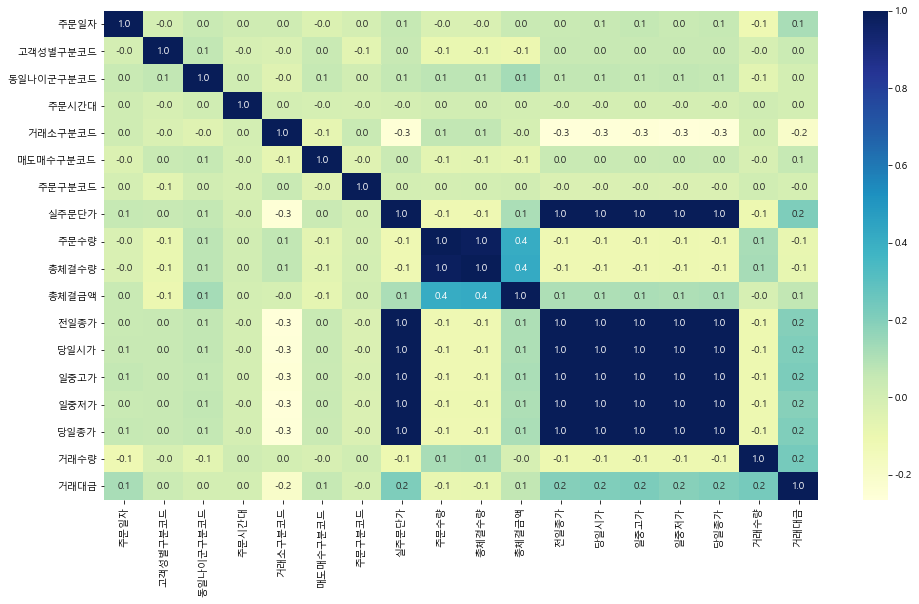

In [6]:
plt.figure(figsize=(16,9))
sns.heatmap(han.corr(), cmap='YlGnBu', annot=True, fmt='0.1f')
plt.show()

In [7]:
han[han.columns[han.dtypes.map(lambda x:x=='object')]].describe().transpose()

,count,unique,top,freq
고객구분코드,845940,24989,A00015340,7604
주소(시도),845940,16,경기,249914
상품번호,845940,1971,00000A005930,60396
상품명,845940,1971,삼성전자보통주,60396
상한가여부,845940,2,N,796639
하한가여부,845940,2,N,844398


In [8]:
# object encoding
# 주소(시도)
# 상한가여부
# 하한가여부

In [9]:
han_e = han.copy()

In [10]:
han_e['주소(시도)'].unique()

array(['경기', '경남', '서울', '광주', '대전', '울산', '대구', '충북', '부산', '인천', '경북',
       '충남', '강원', '전북', '전남', '제주'], dtype=object)

In [11]:
han_e['주소(시도)'].replace({'서울':0, '경기':1, '인천':2, '충북':3, '대전':4, '충남':5, '강원':6, '전북':7, '광주':8, '전남':9, '경북':10, '대구':11, '경남':12, '울산':13, '부산':14, '제주':15}, inplace=True)

In [12]:
han_e['상한가여부'].replace({'N':0, 'Y':1}, inplace=True)

In [13]:
han_e['하한가여부'].replace({'N':0, 'Y':1}, inplace=True)

In [15]:
han_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845940 entries, 0 to 845939
Data columns (total 24 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   고객구분코드     845940 non-null  object
 1   주문일자       845940 non-null  int64 
 2   고객성별구분코드   845940 non-null  int64 
 3   동일나이군구분코드  845940 non-null  int64 
 4   주소(시도)     845940 non-null  int64 
 5   주문시간대      845940 non-null  int64 
 6   상품번호       845940 non-null  object
 7   상품명        845940 non-null  object
 8   거래소구분코드    845940 non-null  int64 
 9   매도매수구분코드   845940 non-null  int64 
 10  주문구분코드     845940 non-null  int64 
 11  실주문단가      845940 non-null  int64 
 12  주문수량       845940 non-null  int64 
 13  총체결수량      845940 non-null  int64 
 14  총체결금액      845940 non-null  int64 
 15  전일종가       845940 non-null  int64 
 16  당일시가       845940 non-null  int64 
 17  일중고가       845940 non-null  int64 
 18  일중저가       845940 non-null  int64 
 19  당일종가       845940 non-null  int64 
 20  거래수량

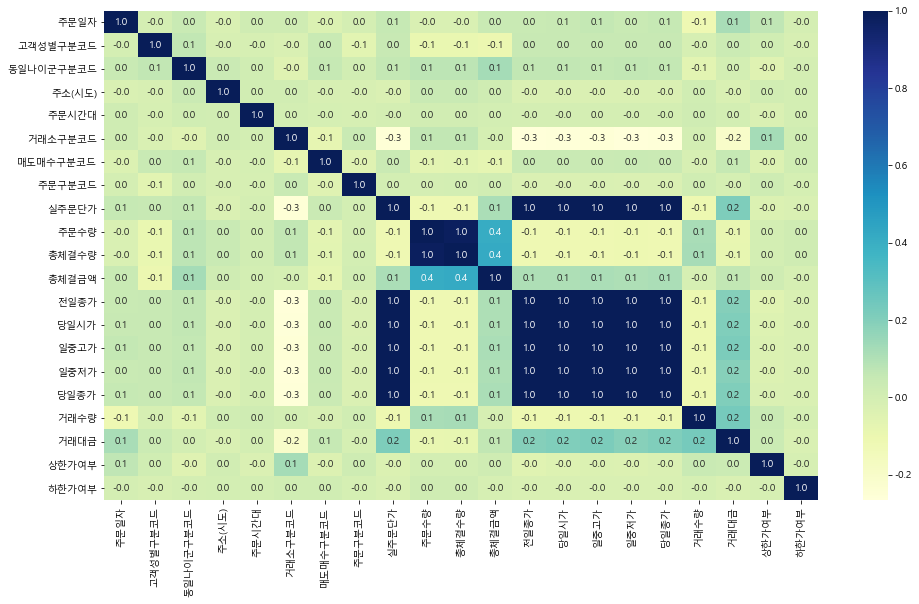

In [16]:
plt.figure(figsize=(16,9))
sns.heatmap(han_e.corr(), cmap='YlGnBu', annot=True, fmt='0.1f')
plt.show()

--------------- 성별 비율 -----------------
1   0.60195
2   0.39805
Name: 고객성별구분코드, dtype: float64
------------------------------------------


([<matplotlib.axis.XTick at 0x228c12044c0>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

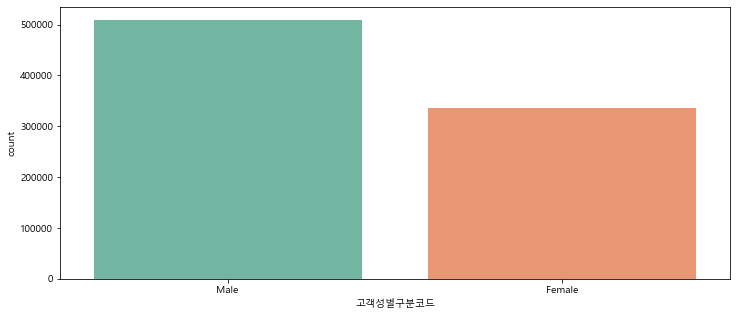

In [44]:
print('--------------- 성별 비율 -----------------')
print(han['고객성별구분코드'].value_counts() / han.shape[0])
print('------------------------------------------')

plt.figure(figsize=(12, 5))
sns.countplot(han['고객성별구분코드'], palette='Set2')
plt.xticks([0,1], ['Male', 'Female'])

In [23]:
han['동일나이군구분코드'].unique()

array([30, 20, 40, 50], dtype=int64)

--------------- MZ세대 성별 비율 -----------------
1   0.61512
2   0.38488
Name: 고객성별구분코드, dtype: float64
-------------------------------------------------


([<matplotlib.axis.XTick at 0x228c13cc9d0>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

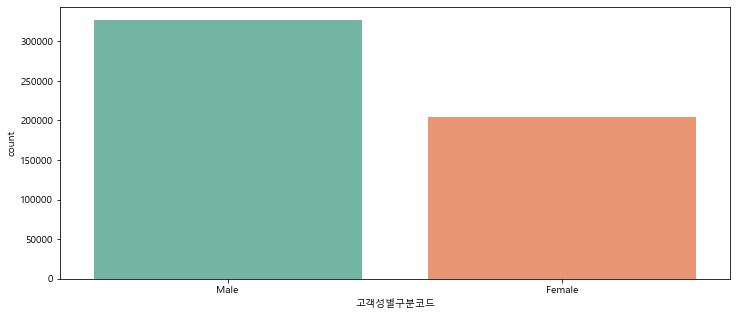

In [40]:
print('--------------- MZ세대 성별 비율 -----------------')
print(han['고객성별구분코드'][han['동일나이군구분코드'].isin([20, 30])].value_counts() / han['고객성별구분코드'][han['동일나이군구분코드'].isin([20, 30])].shape[0])
print('-------------------------------------------------')

plt.figure(figsize=(12, 5))
sns.countplot(han['고객성별구분코드'][han['동일나이군구분코드'].isin([20, 30])], palette='Set2')
plt.xticks([0,1], ['Male', 'Female'])

------------- 데이터에서 MZ 와 아닌 세대 비율 ---------------
30   0.39092
40   0.24847
20   0.23763
50   0.12298
Name: 동일나이군구분코드, dtype: float64
-----------------------------------------------------------


<AxesSubplot:xlabel='동일나이군구분코드', ylabel='count'>

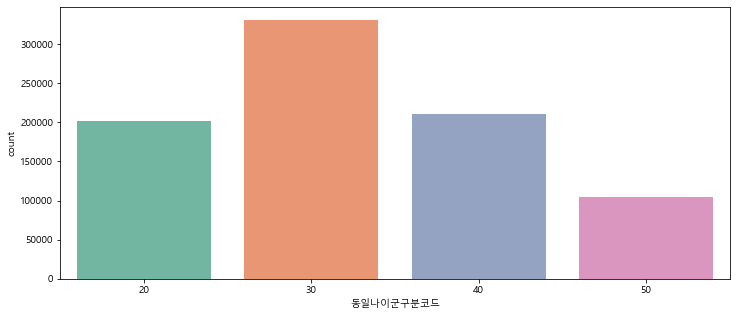

In [34]:
print('------------- 데이터에서 MZ 와 아닌 세대 비율 ---------------')
print(han['동일나이군구분코드'].value_counts() / han.shape[0])
print('-----------------------------------------------------------')

plt.figure(figsize=(12, 5))
sns.countplot(han['동일나이군구분코드'], palette='Set2')
#plt.xticks([0,1], ['MZ아님', 'MZ세대'])

In [36]:
han_e2 = han_e.copy()
han_e2['동일나이군구분코드'].replace({20:1, 30:1, 40:0, 50:0}, inplace=True)
han_e2.head()

,고객구분코드,주문일자,고객성별구분코드,동일나이군구분코드,주소(시도),주문시간대,상품번호,상품명,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금,상한가여부,하한가여부
0,A0001,20200128,1,1,1,1,00000A091970,나노캠텍,3,2,1,3795,20,20,75900,3215,3710,4125,3660,4095,17266597,67323312855,0,0
1,A0001,20200130,1,1,1,3,00000A045060,오공,3,2,1,7710,20,20,154200,7690,8150,8380,7360,7920,15686931,125404000000,0,0
2,A0001,20200313,1,1,1,1,00000A253840,수젠텍,3,2,1,11800,10,10,118000,13600,12200,12250,10150,10750,3731106,40782765600,0,0
3,A00010,20200220,1,1,12,3,00000A009190,대양금속보통주,2,2,1,3505,14,14,49070,3615,3615,3675,3475,3505,635410,2250893355,0,0
4,A000100,20200211,2,0,0,1,00000A001740,SK네트웍스보통주,2,1,1,4875,3,3,14625,4780,4800,4885,4800,4850,1263089,6112026870,0,0


------------- 데이터에서 MZ 와 아닌 세대 비율 ---------------
1   0.62855
0   0.37145
Name: 동일나이군구분코드, dtype: float64
-----------------------------------------------------------


([<matplotlib.axis.XTick at 0x228c1589dc0>,
 [Text(0, 0, 'MZ아님'), Text(1, 0, 'MZ세대')])

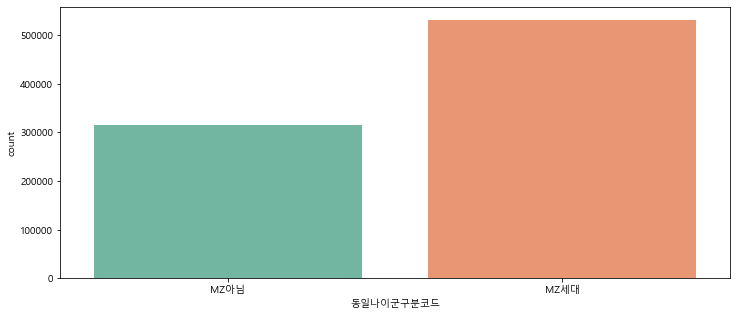

In [42]:
print('------------- 데이터에서 MZ 와 아닌 세대 비율 ---------------')
print(han_e2['동일나이군구분코드'].value_counts() / han_e2.shape[0])
print('-----------------------------------------------------------')

plt.figure(figsize=(12, 5))
sns.countplot(han_e2['동일나이군구분코드'], palette='Set2')
plt.xticks([0,1], ['MZ아님', 'MZ세대'])

In [35]:
# MZ 세대가 MZ 아닌 세대보다 약 2배(약간 안되게) 가량 주문건수가 많다.
# 동학개미운동(20.01.20~20.03.31) 기간동안, 
# MZ 세대는 MZ 아닌 세대보다 주식 투자를 많이 했다.

In [38]:
grouped = han_e2.groupby(['동일나이군구분코드']).mean()
grouped.reset_index(inplace=True)
grouped

,동일나이군구분코드,주문일자,고객성별구분코드,주소(시도),주문시간대,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금,상한가여부,하한가여부
0,0,20200295.74415,1.42035,4.68697,1.91620,2.50636,1.68642,1.24585,36925.57761,180.74044,175.51700,1519870.94861,35984.90631,36377.72885,38126.05012,34687.97253,36286.73821,13192112.63130,277962063422.13763,0.04515,0.00219
1,1,20200292.31440,1.38488,4.22561,1.89375,2.55622,1.64074,1.26256,30406.31346,119.17585,115.95202,840763.66363,29143.61082,29657.23519,31481.43919,28196.44604,29825.18355,17063358.14981,276287674058.76862,0.06604,0.00160


In [45]:
grouped2 = grouped[['실주문단가', '주문수량', '총체결수량', '총체결금액', '거래수량']]
grouped2 = grouped2.transpose()
grouped2

,0,1
실주문단가,36925.57761,30406.31346
주문수량,180.74044,119.17585
총체결수량,175.51700,115.95202
총체결금액,1519870.94861,840763.66363
거래수량,13192112.63130,17063358.14981


In [47]:
grouped3 = grouped2.loc[['주문수량', '총체결수량'], :]

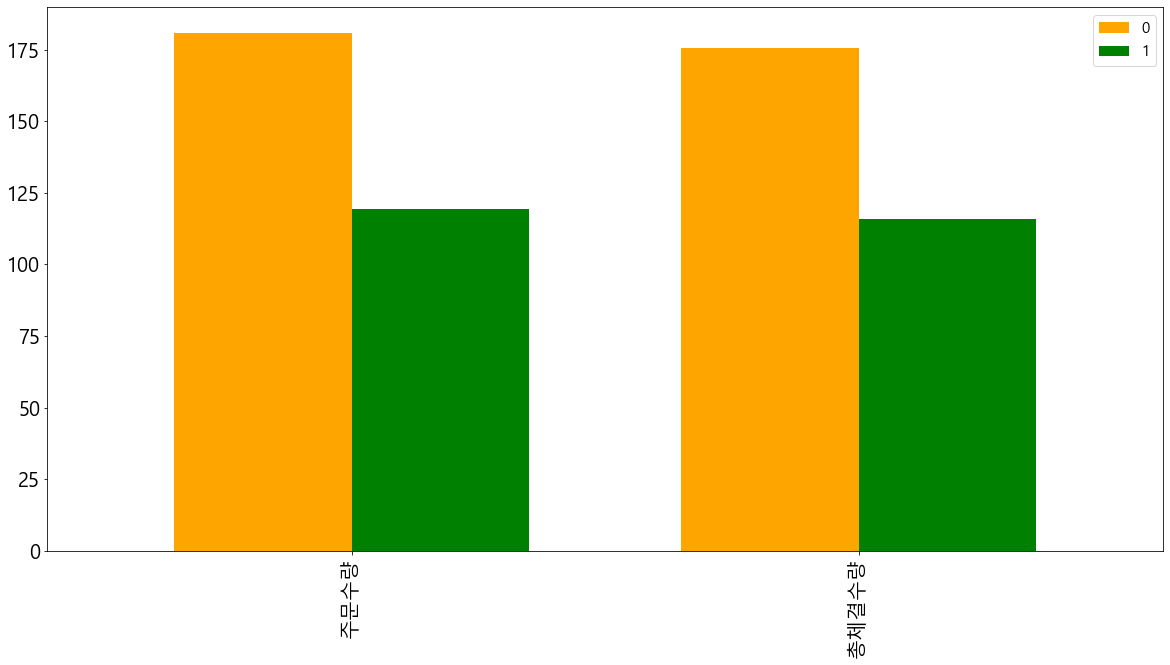

In [58]:
grouped3.plot(kind='bar', figsize=(20, 10), width=0.7,
             color=['orange', 'green'], fontsize=20)
#plt.ylabel('수량', size=20)
#plt.xlabel(['주문수량', '총체결수량'], size=20)
plt.legend(loc='best', fontsize=15)
plt.show()

In [61]:
grouped4 = grouped2.loc[['실주문단가'], :]

In [62]:
grouped4

,0,1
실주문단가,36925.57761,30406.31346


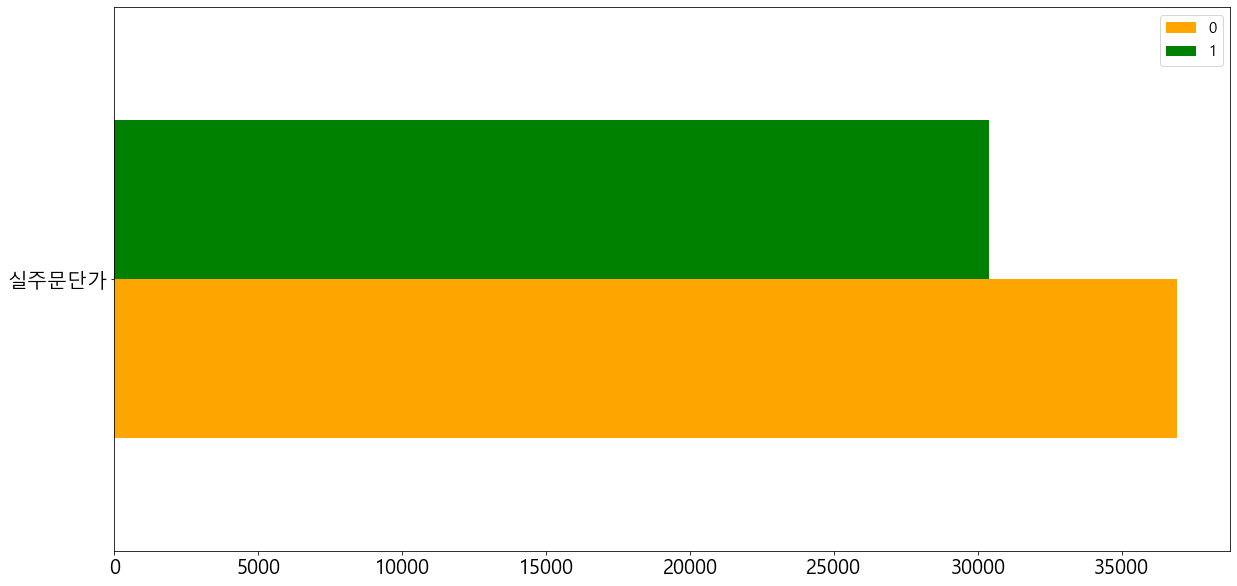

In [68]:
grouped4.plot(kind='barh', figsize=(20, 10), width=0.7, 
             color=['orange', 'green'], fontsize=20)
plt.legend(loc='best', fontsize=15)
plt.show()

--------------- 세대 별 실주문단가 -----------------
                0           1
실주문단가 36925.57761 30406.31346
-----------------------------------------------------


([<matplotlib.axis.XTick at 0x228f6462970>,
 [Text(0, 0, 'MZ아님'), Text(1, 0, 'MZ세대')])

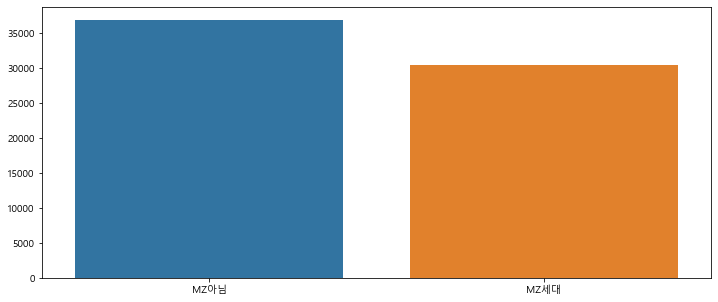

In [78]:
print('--------------- 세대 별 실주문단가 -----------------')
print(grouped4)
print('-----------------------------------------------------')

plt.figure(figsize=(12, 5))
sns.barplot(data=grouped4)
plt.xticks([0,1], ['MZ아님', 'MZ세대'])

In [72]:
grouped5 = grouped2.loc[['총체결금액'], :]

--------------- 세대 별 평균 총체결금액 -----------------
                  0            1
총체결금액 1519870.94861 840763.66363
-----------------------------------------------------


([<matplotlib.axis.XTick at 0x228c15d4c10>,
 [Text(0, 0, 'MZ아님'), Text(1, 0, 'MZ세대')])

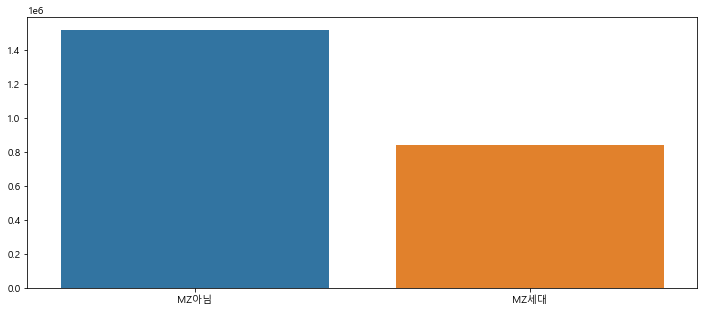

In [77]:
print('--------------- 세대 별 평균 총체결금액 -----------------')
print(grouped5)
print('-----------------------------------------------------')

plt.figure(figsize=(12, 5))
sns.barplot(data=grouped5)
plt.xticks([0,1], ['MZ아님', 'MZ세대'])

In [74]:
grouped6 = grouped2.loc[['거래수량'], :]

--------------- 세대 별 거래수량 -----------------
                  0              1
거래수량 13192112.63130 17063358.14981
-----------------------------------------------------


([<matplotlib.axis.XTick at 0x228f64580a0>,
 [Text(0, 0, 'MZ아님'), Text(1, 0, 'MZ세대')])

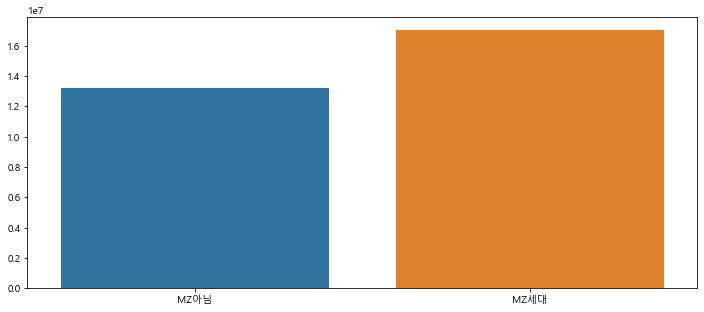

In [76]:
print('--------------- 세대 별 거래수량 -----------------')
print(grouped6)
print('-----------------------------------------------------')

plt.figure(figsize=(12, 5))
sns.barplot(data=grouped6)
plt.xticks([0,1], ['MZ아님', 'MZ세대'])

In [79]:
# MZ 세대는 MZ 아닌 세대에 비해 거래수량은 많았지만,
# 실주문단가, 주문수량, 총체결수량, 총체결금액은 MZ 아닌 세대보다 작았다.
# 특히, 총체결금액은 MZ 세대가 MZ 아닌 세대에 비해 2배나 작았다.
# 따라서, MZ 세대는 MZ 아닌 세대에 비해 소액으로 여러번 주식투자를 한다.
# -> 최근 동학개미운동의 주역은 MZ 세대이다.

In [80]:
han_e2.head()

,고객구분코드,주문일자,고객성별구분코드,동일나이군구분코드,주소(시도),주문시간대,상품번호,상품명,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금,상한가여부,하한가여부
0,A0001,20200128,1,1,1,1,00000A091970,나노캠텍,3,2,1,3795,20,20,75900,3215,3710,4125,3660,4095,17266597,67323312855,0,0
1,A0001,20200130,1,1,1,3,00000A045060,오공,3,2,1,7710,20,20,154200,7690,8150,8380,7360,7920,15686931,125404000000,0,0
2,A0001,20200313,1,1,1,1,00000A253840,수젠텍,3,2,1,11800,10,10,118000,13600,12200,12250,10150,10750,3731106,40782765600,0,0
3,A00010,20200220,1,1,12,3,00000A009190,대양금속보통주,2,2,1,3505,14,14,49070,3615,3615,3675,3475,3505,635410,2250893355,0,0
4,A000100,20200211,2,0,0,1,00000A001740,SK네트웍스보통주,2,1,1,4875,3,3,14625,4780,4800,4885,4800,4850,1263089,6112026870,0,0


In [81]:
df = han_e2[['고객성별구분코드', '동일나이군구분코드', '주소(시도)', '주문시간대', '거래소구분코드', '매도매수구분코드', '주문구분코드', '실주문단가', '주문수량', '총체결수량', '총체결금액', '전일종가', '당일시가', '일중고가', '일중저가', '당일종가', '거래수량', '거래대금']]
df

,고객성별구분코드,동일나이군구분코드,주소(시도),주문시간대,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금
0,1,1,1,1,3,2,1,3795,20,20,75900,3215,3710,4125,3660,4095,17266597,67323312855
1,1,1,1,3,3,2,1,7710,20,20,154200,7690,8150,8380,7360,7920,15686931,125404000000
2,1,1,1,1,3,2,1,11800,10,10,118000,13600,12200,12250,10150,10750,3731106,40782765600
3,1,1,12,3,2,2,1,3505,14,14,49070,3615,3615,3675,3475,3505,635410,2250893355
4,2,0,0,1,2,1,1,4875,3,3,14625,4780,4800,4885,4800,4850,1263089,6112026870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845935,1,1,3,2,3,2,1,2020,150,150,303000,1995,2035,2135,1990,2030,2764564,5682482755
845936,1,1,3,2,3,1,1,63400,8,8,507200,57300,61700,70600,58700,60300,8892944,560929000000
845937,1,1,3,1,3,2,1,38800,25,25,970000,38900,40050,40800,37500,40400,1912985,75631708300
845938,1,1,3,1,2,1,1,69200,8,8,553600,74800,69700,71600,68000,69400,8037426,560505000000


In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

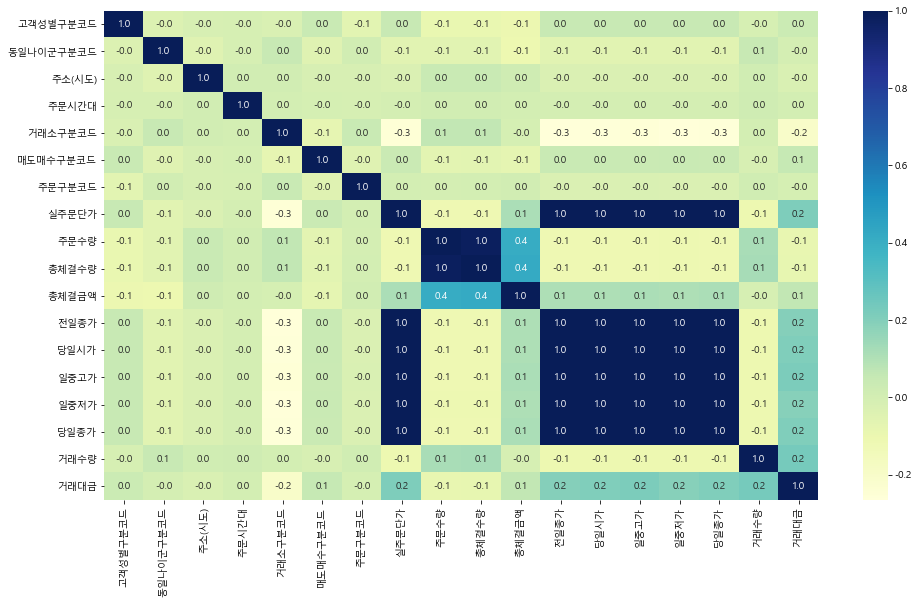

In [85]:
plt.figure(figsize=(16,9))
sns.heatmap(scaled_df.corr(), cmap='YlGnBu', annot=True, fmt='0.1f')
plt.show()

In [86]:
# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# model
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift, estimate_bandwidth

# grid search
from sklearn.model_selection import GridSearchCV

# evaluation
from sklearn.metrics.cluster import silhouette_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import *

In [87]:
pca = PCA(n_components=2)
reduced_df = pca.fit_transform(df)
reduced_df.shape

(845940, 2)

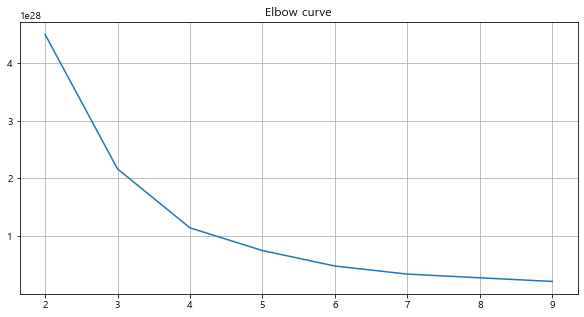

In [88]:
distortions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(reduced_df)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [94]:
from sklearn import cluster

kmeans = cluster.KMeans(init='random', n_clusters=10, n_init=10)

kmeans.fit(df)

cluster_label = kmeans.labels_
df['cluster'] = cluster_label

df.head()

,고객성별구분코드,동일나이군구분코드,주소(시도),주문시간대,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금,cluster
0,1,1,1,1,3,2,1,3795,20,20,75900,3215,3710,4125,3660,4095,17266597,67323312855,8
1,1,1,1,3,3,2,1,7710,20,20,154200,7690,8150,8380,7360,7920,15686931,125404000000,1
2,1,1,1,1,3,2,1,11800,10,10,118000,13600,12200,12250,10150,10750,3731106,40782765600,3
3,1,1,12,3,2,2,1,3505,14,14,49070,3615,3615,3675,3475,3505,635410,2250893355,3
4,2,0,0,1,2,1,1,4875,3,3,14625,4780,4800,4885,4800,4850,1263089,6112026870,3


In [95]:
df_kmeans_grouped = df.groupby('동일나이군구분코드')
df_kmeans_grouped['cluster'].value_counts()

동일나이군구분코드  cluster
0          3          138400
           8           51673
           1           38815
           6           24206
           5           17050
           4           10265
           0           10177
           7           10165
           9            7263
           2            6210
1          3          218070
           8           89204
           1           65981
           6           47253
           5           36227
           4           21329
           7           16107
           0           14531
           9           12831
           2           10183
Name: cluster, dtype: int64

In [96]:
e = pd.DataFrame(df_kmeans_grouped['cluster'].value_counts())
e.columns = ['count']
e.reset_index(inplace=True)
e

,동일나이군구분코드,cluster,count
0,0,3,138400
1,0,8,51673
2,0,1,38815
3,0,6,24206
4,0,5,17050
5,0,4,10265
6,0,0,10177
7,0,7,10165
8,0,9,7263
9,0,2,6210


<AxesSubplot:xlabel='동일나이군구분코드', ylabel='count'>

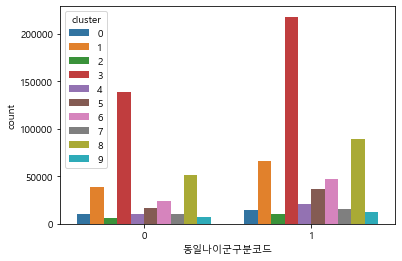

In [97]:
sns.barplot(x='동일나이군구분코드', y='count', hue='cluster', data=e)

In [98]:
# 정답없이 분류하는 k-means 모델을 통해 MZ세대(1) 와 MZ아닌세대(0) 의
# 특징적인 cluster 가 있는지 확인해봤지만, 두 세대간 구별되는 차이 없음.

In [99]:
df = han_e2[['고객성별구분코드', '동일나이군구분코드', '주소(시도)', '주문시간대', '거래소구분코드', '매도매수구분코드', '주문구분코드', '실주문단가', '주문수량', '총체결수량', '총체결금액', '전일종가', '당일시가', '일중고가', '일중저가', '당일종가', '거래수량', '거래대금']]
df

,고객성별구분코드,동일나이군구분코드,주소(시도),주문시간대,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금
0,1,1,1,1,3,2,1,3795,20,20,75900,3215,3710,4125,3660,4095,17266597,67323312855
1,1,1,1,3,3,2,1,7710,20,20,154200,7690,8150,8380,7360,7920,15686931,125404000000
2,1,1,1,1,3,2,1,11800,10,10,118000,13600,12200,12250,10150,10750,3731106,40782765600
3,1,1,12,3,2,2,1,3505,14,14,49070,3615,3615,3675,3475,3505,635410,2250893355
4,2,0,0,1,2,1,1,4875,3,3,14625,4780,4800,4885,4800,4850,1263089,6112026870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845935,1,1,3,2,3,2,1,2020,150,150,303000,1995,2035,2135,1990,2030,2764564,5682482755
845936,1,1,3,2,3,1,1,63400,8,8,507200,57300,61700,70600,58700,60300,8892944,560929000000
845937,1,1,3,1,3,2,1,38800,25,25,970000,38900,40050,40800,37500,40400,1912985,75631708300
845938,1,1,3,1,2,1,1,69200,8,8,553600,74800,69700,71600,68000,69400,8037426,560505000000


In [100]:
x = df[['고객성별구분코드', '주소(시도)', '주문시간대', '거래소구분코드', '매도매수구분코드', '주문구분코드', '실주문단가', '주문수량', '총체결수량', '총체결금액', '전일종가', '당일시가', '일중고가', '일중저가', '당일종가', '거래수량', '거래대금']]
y = df['동일나이군구분코드']

from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

print(x_train.shape)
print(x_test.shape)


(761346, 17)
(84594, 17)


In [104]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train, y_train)

y_hat = knn.predict(x_test)

from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, y_hat)
print(knn_matrix)

knn_report = metrics.classification_report(y_test, y_hat)
print(knn_report)

[[15936 15549]
 [12660 40449]]
              precision    recall  f1-score   support

           0       0.56      0.51      0.53     31485
           1       0.72      0.76      0.74     53109

    accuracy                           0.67     84594
   macro avg       0.64      0.63      0.64     84594
weighted avg       0.66      0.67      0.66     84594



In [105]:
x = df.loc[0:1000, ['고객성별구분코드', '주소(시도)', '주문시간대', '거래소구분코드', '매도매수구분코드', '주문구분코드', '실주문단가', '주문수량', '총체결수량', '총체결금액', '전일종가', '당일시가', '일중고가', '일중저가', '당일종가', '거래수량', '거래대금']]
y = df.loc[0:1000, '동일나이군구분코드']

from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

print(x_train.shape)
print(x_test.shape)

(900, 17)
(101, 17)


In [110]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(x_train, y_train)

pred = model.predict(x_test)

print((pred == y_test).mean())

0.6039603960396039


In [111]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(model, out_file='tree_han.dot',
                class_names='10',
                feature_names=['고객성별구분코드', '주소(시도)', '주문시간대', '거래소구분코드', '매도매수구분코드', '주문구분코드', '실주문단가', '주문수량', '총체결수량', '총체결금액', '전일종가', '당일시가', '일중고가', '일중저가', '당일종가', '거래수량', '거래대금'],
                impurity=False, # gini 미출력
                filled=True) # filled: node의 색깔을 다르게

In [112]:
import os
os.environ["PATH"]+=os.pathsep+'C:\\Program Files\\Graphviz\\bin'

In [114]:
import graphviz
with open('tree_han.dot', 'r', encoding='UTF8') as f:
    dot_graph = f.read()

dot = graphviz.Source(dot_graph) # dot_graph의 source 저장
dot.render(filename='tree_han', format='svg') # svg로 저장

'tree_han.svg'

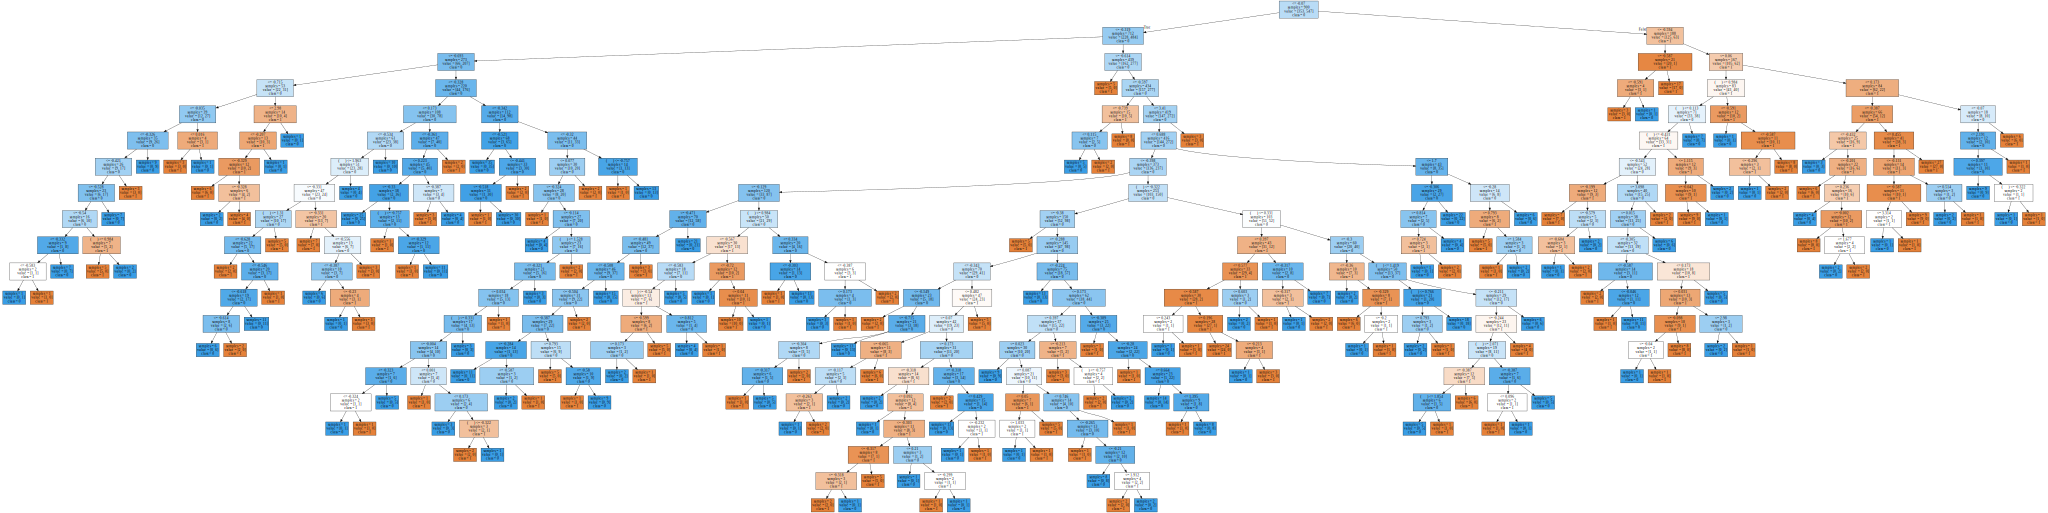

In [115]:
import graphviz

with open('tree_han.dot', 'rt', encoding='UTF8') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [3]:
# 약 0.60의 정확도로 MZ 세대와 MZ 아닌 세대를 구분하는 인자는 아래와 같다.
# 1. 총체결금액
# 2. 거래대금
# 3. 거래수량

In [4]:
han['동일나이군구분코드'].unique()

array([30, 20, 40, 50], dtype=int64)

In [5]:
han_mz = han.copy()
han_mz['동일나이군구분코드'] = han_mz['동일나이군구분코드'].map(lambda x: 1 if x in [20, 30] else 0)
han_mz['동일나이군구분코드'].unique()

array([1, 0], dtype=int64)

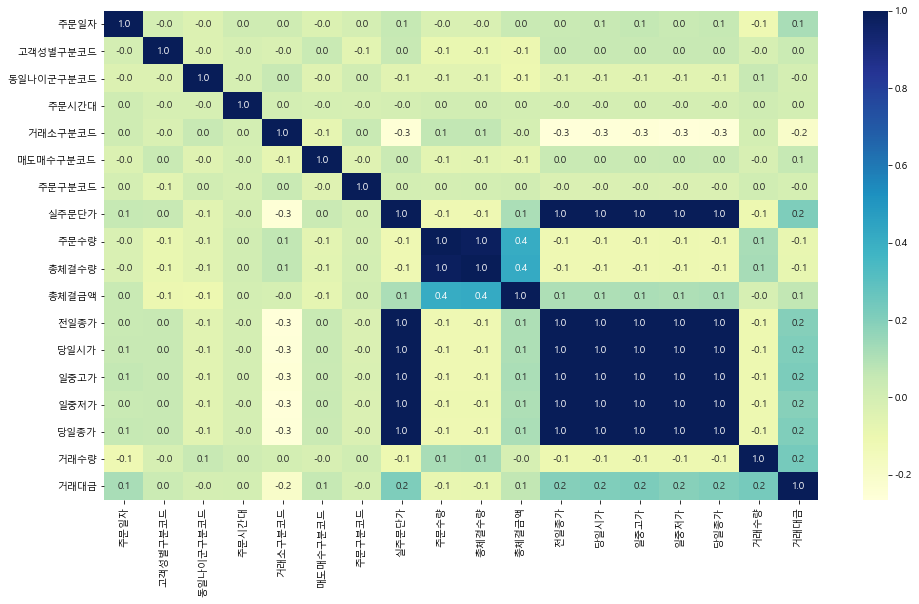

In [6]:
plt.figure(figsize=(16,9))
sns.heatmap(han_mz.corr(), cmap='YlGnBu', annot=True, fmt='0.1f')
plt.show()

In [7]:
han_mz[han_mz.columns[han_mz.dtypes.map(lambda x:x=='object')]].describe().transpose()

,count,unique,top,freq
고객구분코드,845940,24989,A00015340,7604
주소(시도),845940,16,경기,249914
상품번호,845940,1971,00000A005930,60396
상품명,845940,1971,삼성전자보통주,60396
상한가여부,845940,2,N,796639
하한가여부,845940,2,N,844398


In [8]:
han_mz2 = han_mz.copy()
han_mz2.drop(['고객구분코드', '상품번호', '상품명'], axis=1, inplace=True)
han_mz2.head()

,주문일자,고객성별구분코드,동일나이군구분코드,주소(시도),주문시간대,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금,상한가여부,하한가여부
0,20200128,1,1,경기,1,3,2,1,3795,20,20,75900,3215,3710,4125,3660,4095,17266597,67323312855,N,N
1,20200130,1,1,경기,3,3,2,1,7710,20,20,154200,7690,8150,8380,7360,7920,15686931,125404000000,N,N
2,20200313,1,1,경기,1,3,2,1,11800,10,10,118000,13600,12200,12250,10150,10750,3731106,40782765600,N,N
3,20200220,1,1,경남,3,2,2,1,3505,14,14,49070,3615,3615,3675,3475,3505,635410,2250893355,N,N
4,20200211,2,0,서울,1,2,1,1,4875,3,3,14625,4780,4800,4885,4800,4850,1263089,6112026870,N,N


In [9]:
d_han_mz2 = pd.get_dummies(han_mz2)
d_han_mz2.head()

,주문일자,고객성별구분코드,동일나이군구분코드,주문시간대,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금,주소(시도)_강원,주소(시도)_경기,주소(시도)_경남,주소(시도)_경북,주소(시도)_광주,주소(시도)_대구,주소(시도)_대전,주소(시도)_부산,주소(시도)_서울,주소(시도)_울산,주소(시도)_인천,주소(시도)_전남,주소(시도)_전북,주소(시도)_제주,주소(시도)_충남,주소(시도)_충북,상한가여부_N,상한가여부_Y,하한가여부_N,하한가여부_Y
0,20200128,1,1,1,3,2,1,3795,20,20,75900,3215,3710,4125,3660,4095,17266597,67323312855,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,20200130,1,1,3,3,2,1,7710,20,20,154200,7690,8150,8380,7360,7920,15686931,125404000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,20200313,1,1,1,3,2,1,11800,10,10,118000,13600,12200,12250,10150,10750,3731106,40782765600,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,20200220,1,1,3,2,2,1,3505,14,14,49070,3615,3615,3675,3475,3505,635410,2250893355,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,20200211,2,0,1,2,1,1,4875,3,3,14625,4780,4800,4885,4800,4850,1263089,6112026870,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [10]:
x = d_han_mz2.loc[:, d_han_mz2.columns != '동일나이군구분코드']
y = d_han_mz2['동일나이군구분코드']

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred = dt.predict(x_test)

from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, pred)
print(knn_matrix)

from sklearn import metrics
model_report = metrics.classification_report(y_test, pred)
print(model_report)

[[36212 26688]
 [28411 77877]]
              precision    recall  f1-score   support

           0       0.56      0.58      0.57     62900
           1       0.74      0.73      0.74    106288

    accuracy                           0.67    169188
   macro avg       0.65      0.65      0.65    169188
weighted avg       0.68      0.67      0.68    169188



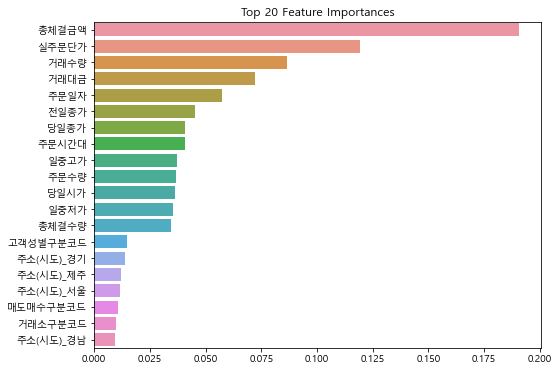

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = dt.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [14]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [15]:
print(sum(pred==y_test)/len(y_test))

0.03789275835165615


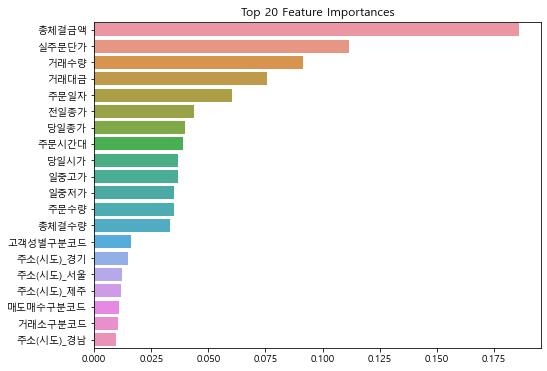

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [21]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(dt, out_file='tree_han.dot',
                class_names=['MZ아님','MZ세대'],
                feature_names=x.columns,
                max_depth=4,
                precision=3,
                impurity=False, # gini 미출력
                filled=True) # filled: node의 색깔을 다르게

In [22]:
import os
os.environ["PATH"]+=os.pathsep+'C:\\Program Files\\Graphviz\\bin'

In [23]:
import graphviz
with open('tree_han.dot', 'rt', encoding='UTF8') as file_reader:
    dot_graph = file_reader.read()

dot = graphviz.Source(dot_graph) # dot_graph의 source 저장
dot.render(filename='tree_han', format='svg') # svg로 저장

'tree_han.svg'

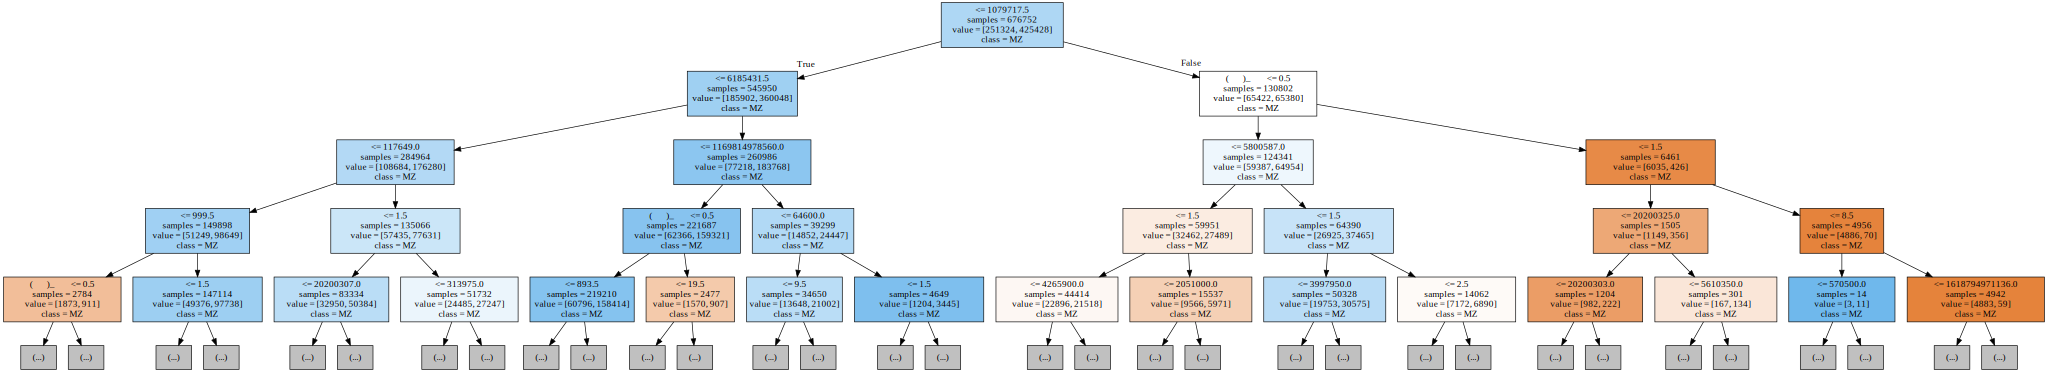

In [24]:
import graphviz

with open('tree_han.dot', 'rt', encoding='UTF8') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [25]:
keys = []
values = []
for i, j in zip(dt.feature_importances_, x.columns):
    keys.append(i)
    values.append(j)
    a = dict(zip(keys, values))
    
b = sorted(a.items(), reverse=True)
print(b)

[(0.19081707907251666, '총체결금액'), (0.11949630113704958, '실주문단가'), (0.08669236593046172, '거래수량'), (0.07224941147794486, '거래대금'), (0.05745257912100466, '주문일자'), (0.04512135148340777, '전일종가'), (0.04061738139500638, '당일종가'), (0.04060206594610763, '주문시간대'), (0.037184505122132214, '일중고가'), (0.03674370119205096, '주문수량'), (0.03614583162730683, '당일시가'), (0.035146136009837944, '일중저가'), (0.034649599634627055, '총체결수량'), (0.014562167405641457, '고객성별구분코드'), (0.013764334487486271, '주소(시도)_경기'), (0.011884352572671975, '주소(시도)_제주'), (0.011782594352777589, '주소(시도)_서울'), (0.010815431824029775, '매도매수구분코드'), (0.009574545164047195, '거래소구분코드'), (0.009351530738111916, '주소(시도)_경남'), (0.00888453584645694, '주소(시도)_부산'), (0.008314167706450357, '주소(시도)_대구'), (0.0074566082143465795, '주문구분코드'), (0.00721009336588201, '주소(시도)_인천'), (0.006828060730704311, '주소(시도)_충남'), (0.006722656812970767, '주소(시도)_경북'), (0.005802171985380524, '주소(시도)_충북'), (0.005716000303036781, '주소(시도)_대전'), (0.005131126944355282, '주소(시도)_울산'), (0.00

In [26]:
# MZ세대와 MZ아닌세대를 구분하는 중요 feature 는 다음과 같다.
#1. 총체결금액 (<= 1079707.5)
#2. 실주문단가 ()
#3. 거래수량 (<= 6185431.5)
#4. 거래대금 (<= 1169814978560.0)
#5. 주문일자 ()

In [27]:
grouped = han_mz2.groupby(['동일나이군구분코드']).mean()
grouped.reset_index(inplace=True)
grouped

,동일나이군구분코드,주문일자,고객성별구분코드,주문시간대,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금
0,0,20200295.74415,1.42035,1.91620,2.50636,1.68642,1.24585,36925.57761,180.74044,175.51700,1519870.94861,35984.90631,36377.72885,38126.05012,34687.97253,36286.73821,13192112.63130,277962063422.13763
1,1,20200292.31440,1.38488,1.89375,2.55622,1.64074,1.26256,30406.31346,119.17585,115.95202,840763.66363,29143.61082,29657.23519,31481.43919,28196.44604,29825.18355,17063358.14981,276287674058.76862


-----------------------------------------------------
          총체결금액
0 1519870.94861
1  840763.66363
-----------------------------------------------------


([<matplotlib.axis.XTick at 0x1ab7cdce070>,
 [Text(0, 0, 'MZ아님'), Text(1, 0, 'MZ세대')])

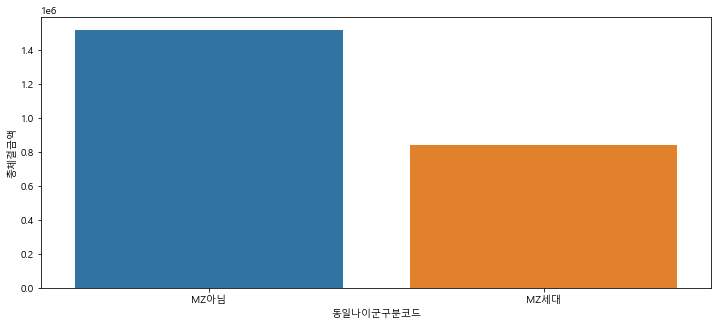

In [28]:
print('-----------------------------------------------------')
print(grouped[['총체결금액']])
print('-----------------------------------------------------')

plt.figure(figsize=(12, 5))
sns.barplot(x='동일나이군구분코드', y='총체결금액', data=grouped)
plt.xticks([0,1], ['MZ아님', 'MZ세대'])

-----------------------------------------------------
            거래수량
0 13192112.63130
1 17063358.14981
-----------------------------------------------------


([<matplotlib.axis.XTick at 0x1ab7c950160>,
 [Text(0, 0, 'MZ아님'), Text(1, 0, 'MZ세대')])

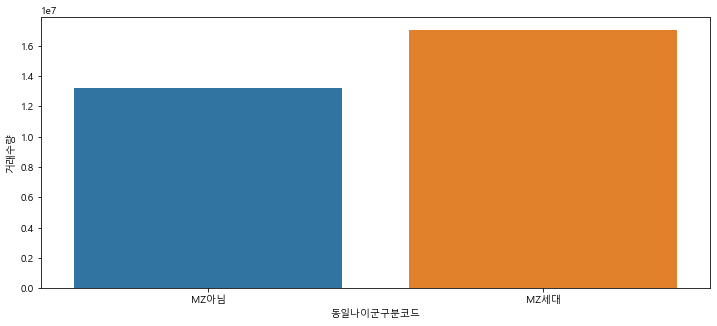

In [29]:
print('-----------------------------------------------------')
print(grouped[['거래수량']])
print('-----------------------------------------------------')

plt.figure(figsize=(12, 5))
sns.barplot(x='동일나이군구분코드', y='거래수량', data=grouped)
plt.xticks([0,1], ['MZ아님', 'MZ세대'])

In [30]:
# 총체결금액: MZ 아님 > MZ 세대
# 거래수량:  MZ 아님 < MZ 세대